In [1]:
import pandas as pd
from tabulate import tabulate
import plotly.express as px
import sys
import os
# Add the parent directory to sys.path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from scripts.convert_to_csv import xml_to_csv, convert_excel_to_csv
from scripts.data_processing import process_and_generate_report

# Convert XML to CSV
# xml_to_csv('/Users/selinamangaroo/Desktop/data-visualization/data/malhm_murray_data_nov_2024')

# Convert Excel files to CSV
convert_excel_to_csv('/Users/selinamangaroo/Desktop/data-visualization/data/Dinosaur_State_Park')

Processing file: /Users/selinamangaroo/Desktop/data-visualization/data/Dinosaur_State_Park/ppslibrary.xls
WARNING *** file size (45147) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
Converted /Users/selinamangaroo/Desktop/data-visualization/data/Dinosaur_State_Park/ppslibrary.xls to /Users/selinamangaroo/Desktop/data-visualization/data/Dinosaur_State_Park_csv/ppslibrary.csv
Processing file: /Users/selinamangaroo/Desktop/data-visualization/data/Dinosaur_State_Park/ppsacession.xls
WARNING *** file size (59070) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
Converted /Users/selinamangaroo/Desktop/data-visualization/data/Dinosaur_State_Park/ppsacession.xls to /Users/selinamangaroo/Desktop/data-visualization/data/Dinosaur_Stat

In [4]:
csv_file_path = '/Users/selinamangaroo/Desktop/data-visualization/data/malhm_murray_data_nov_2024_csv/MurrayLibrary.csv'
df = pd.read_csv(csv_file_path, index_col=0, low_memory=False)

print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, E-011 to nan
Columns: 143 entries, acqvalue to ppid
dtypes: bool(1), float64(84), int64(11), object(47)
memory usage: 108.5+ KB
None


Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, E-011 to nan
Columns: 143 entries, acqvalue to ppid
dtypes: bool(1), float64(84), int64(11), object(47)
memory usage: 108.5+ KB
None


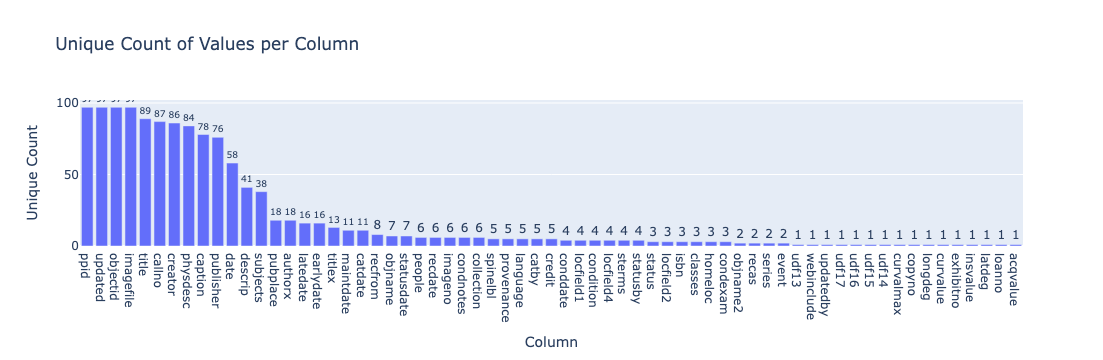

Bar chart image saved: reports/MurrayLibrary_unique_count_chart.png
PDF report generated: reports/MurrayLibrary_report.pdf


In [6]:
process_and_generate_report(csv_file_path)

In [12]:
# Display summary statistics for numerical columns:
# print(df.describe())

# For categorical columns:
# print(df.describe(include='object'))

In [28]:
# print(df.info()) 

# Count of missing values per column:
print(df.isnull().sum())

acqvalue       0
age         1258
caption     1036
catby         20
catdate        0
            ... 
widthft        0
widthin        0
xcord          0
ycord          0
zcord          0
Length: 143, dtype: int64


In [24]:
# Display unique values for each column:
# print(df.nunique())

# Unique values for a specific column:
print(df['maintdate'].value_counts())

maintdate
2017-09-28    398
2017-12-08     74
2018-01-12     18
2017-12-07      9
2015-09-15      5
2018-10-10      4
2017-12-06      4
2018-10-09      3
2017-10-05      3
2015-09-12      3
2014-10-29      2
2014-09-15      1
2016-08-12      1
2016-07-29      1
2016-07-13      1
2018-01-10      1
2016-06-16      1
2018-09-15      1
Name: count, dtype: int64


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, nan to nan
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   accessno    531 non-null    object 
 1   accruals    3 non-null      object 
 2   acqvalue    531 non-null    float64
 3   admin       5 non-null      object 
 4   authorx     3 non-null      object 
 5   caption     223 non-null    object 
 6   catby       451 non-null    object 
 7   catdate     530 non-null    object 
 8   cattype     523 non-null    object 
 9   classes     7 non-null      object 
 10  collection  11 non-null     object 
 11  conddate    17 non-null     object 
 12  condexam    17 non-null     object 
 13  condition   340 non-null    object 
 14  condnotes   206 non-null    object 
 15  containtxt  2 non-null      object 
 16  creator     8 non-null      object 
 17  credit      30 non-null     object 
 18  curvalmax   531 non-null    float64
 19  curvalue    531 non-null    floa

In [30]:
# Dictionary to store unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Create a DataFrame to summarize unique values
summary_df = pd.DataFrame({
    'Column': unique_values.keys(),
    'Unique Values': [', '.join(map(str, values[:100])) + ('...' if len(values) > 100 else '') for values in unique_values.values()],
    'Unique Count': [len(values) for values in unique_values.values()]
})

In [35]:
# Use tabulate to format the table
# formatted_table = tabulate(summary_df, headers='keys', tablefmt='grid')
# print(formatted_table)

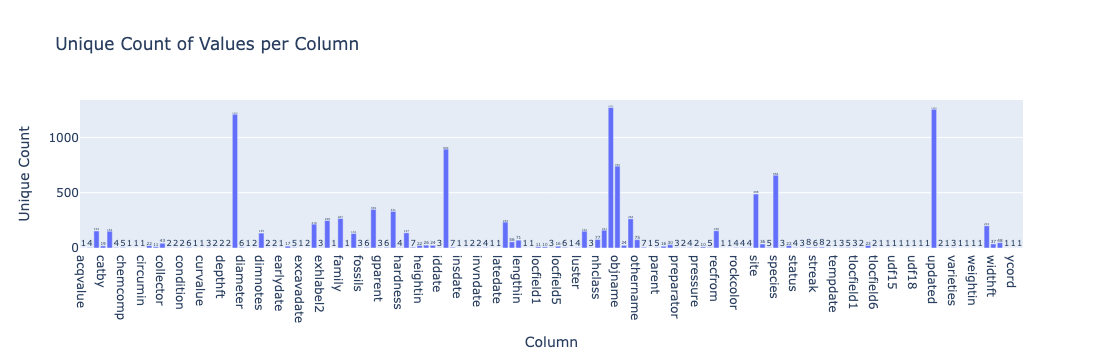

In [32]:
# Display the summary as an interactive table
fig = px.bar(summary_df, x='Column', y='Unique Count', text='Unique Count', title='Unique Count of Values per Column')
fig.update_traces(textposition='outside')
fig.show()

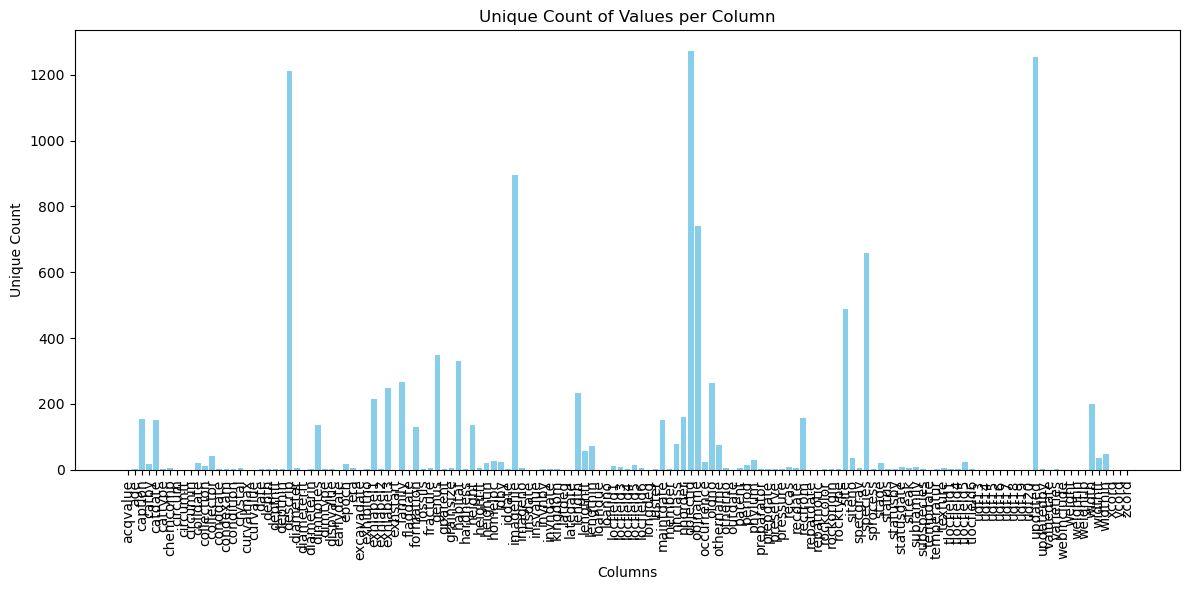

In [33]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(summary_df['Column'], summary_df['Unique Count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Unique Count')
plt.title('Unique Count of Values per Column')
plt.tight_layout()
plt.show()

In [8]:
cols = []
for c in cols:
    counts = df[c].value_counts().to_dict()
    print(c, len(counts), counts)
    print("\n")

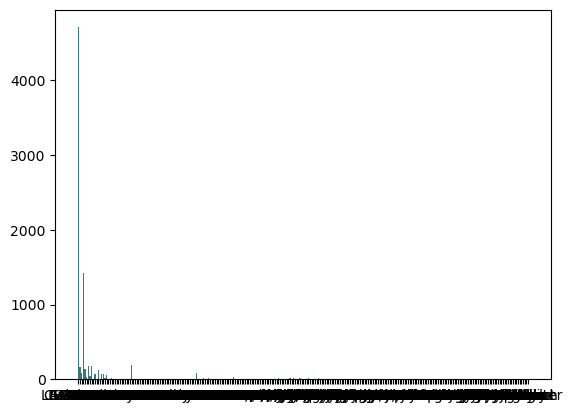

city 270 

ADRIAN :  1
AKRON :  2
ANOKA :  1
AVOCA :  65
AVOCA, MN :  1
Aberdeen :  1
Anoka :  1
Arvada :  1
Aurora :  1
Austin :  1
Avoca :  15
Avoca MN 56114 :  1
BALATON :  161
BALATON, MN :  4
BASCOM :  1
BUCKELY :  3
BUCKLEY :  5
BURNSVILLE :  1
Balaton :  25
Balaton MN 56115 :  1
Baxter :  2
Bedford :  1
Belle Plaine :  1
Bloomington MN :  1
Brainerd :  1
Brewster :  1
Brooklyn :  1
Burnsville :  1
CALIFORNIA :  1
CHANDLER :  79
CHANDLER, MN :  7
COLUMBUS :  2
COON RAPIDS :  1
COURTLAND :  2
CURRIE :  70
Central Point :  1
Central Port :  1
Chandler :  15
Chanhassen  MN 55317 :  1
Chanhasson MN 55317 :  1
Chatfield  MN 55923 :  1
Clear Lake :  1
Clive IA 50325 :  1
Cold Springs :  1
Cottage Grove :  1
Courtland :  1
Crystal River :  1
Currie :  14
Currie MN 56123 :  1
DOVRAY :  16
DULUTH :  1
DUNDEE :  64
DUNDEE, MN :  1
Dakota Dunes :  1
Darwin :  1
Dewit :  1
Dovray :  1
Duluth :  1
EAGAN :  1
EDEN PRAIRIE :  2
EDGERTON :  8
ENTERPRISE :  1
ESTATE :  1
Edgerton :  1
Edgerton MN

In [12]:
from collections import Counter
from matplotlib import pyplot as plt

spec_col = ["city"]
# spec_col = ["material", "cattype", "condition", "invnby", "objname"]

for col in spec_col:
    A = df[col]
    freqs = Counter(A)
    xvals = range(len(freqs.values()))
    plt.bar(xvals, freqs.values() , color='#37777D')
    plt.xticks(xvals, freqs.keys())
    plt.show() 
    
    counts = df[col].value_counts().to_dict()
    print(col, len(counts), "\n")
    # Iterate over key/value pairs in dict and print them
    for key, value in sorted(counts.items()):
        print(key, ': ', value)
        


In [6]:
for col in df.columns[1:]:
    if str(df[col].dtype) == "int64" or str(df[col].dtype) == "float64":
        C = df[col]
        freqs = Counter(C)

        xvals = range(len(freqs.values()))
        plt.bar(xvals, freqs.values() , color='#37777D')
        plt.xticks(xvals, freqs.keys())
        plt.show()
        print(col, df[col].dtype)
#         print(list(df[col].unique()))
        counts = df[col].value_counts().to_dict()
        print(col, len(counts), counts)

NameError: name 'Counter' is not defined

In [ ]:
for col in df.columns[1:]:
        print(col, df[col].dtype)
        counts = df[col].value_counts().to_dict()
        print(counts)

In [ ]:
for col in df.columns[1:]:
        C = df[col]
        freqs = Counter(C)

        xvals = range(len(freqs.values()))
        plt.bar(xvals, freqs.values() , color='#37777D')
        plt.xticks(xvals, freqs.keys())
        plt.show()
        print(col, df[col].dtype)
        if len(list(df[col].unique())) < 50:
            print(list(df[col].unique()))

In [21]:
df.head(100)

,accdate,accessno,addname,address1,address12,address2,city,city2,contact,country,...,restrict,state,state2,tyldate,updated,updatedby,website,zip,zip2,ppid
accby,,,,,,,,,,,,,,,,,,,,,
Unknown,NaN,01,NaN,Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,NaN,194C1B06-6DEC-4020-AEEE-421168664029
Unknown,NaN,02,NaN,Unknown,NaN,NaN,Greenbush,NaN,NaN,NaN,...,NaN,MN,NaN,NaN,2016-02-19T14:48:15,Unknown,NaN,56726,NaN,66547587-E366-43A2-BC58-386988532852
Unknown,NaN,03,NaN,Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2011-01-20T15:29:09,Unknown,NaN,Unknown,NaN,CDB892ED-EC1A-41A9-BEFD-011615299740
NaN,NaN,04,NaN,Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,4D5EECAB-84DE-4620-B06C-171038330081
NaN,NaN,05,"Bollie, Albert",Unknown,NaN,NaN,Gatzke,NaN,NaN,NaN,...,NaN,MN,NaN,NaN,2009-11-03T13:52:23,Unknown,NaN,Unknown,NaN,73E9F519-62D9-4396-82CF-053021287090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,82,"Shetterly, Bob & Joan",Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-05-25T12:42:09,Unknown,NaN,NaN,NaN,59AE0975-90DE-4B26-9B63-193227151590
NaN,NaN,84,NaN,Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9F4DA8EF-2A4A-4ABB-A36A-509904523226
NaN,NaN,88,"Shetterly, Bob & Joan",Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-05-25T12:42:54,Unknown,NaN,NaN,NaN,A96BEC03-6360-4CCC-86BB-420151621334


In [ ]:
df.loc[(df.type == 'physical_object'),'type'] = 'artifact'

In [ ]:
new_df = df[["objectid", "objname", "type", "descrip", "date", "notes", "invnby", "invndate", "material"]]
new_df = new_df.head(10)
new_df

In [22]:
df.to_csv('Roseau_PPaccession_pre_processed.csv')